<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Pre_processing_dataset_yudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration des données


In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix


Télechargement du dataset

In [2]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv

--2023-05-14 17:28:06--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-14 17:28:07 (16.7 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-14 17:28:07--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [3]:
!ls

sample_data  testinputs.csv  traininginputs.csv  trainingoutput.csv


In [4]:
df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')


**Training Inputs**

In [6]:
df_training_inputs.shape

(34515, 14)

In [20]:
df_training_inputs.describe()


,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,15888.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,0.388173,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867
std,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.024425,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,0.240000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000
25%,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,0.380000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000
50%,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,0.390000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000
75%,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,0.410000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,0.420000,11.990000,6.670000,43.410000,84.600000,127.300000,6.670000


In [28]:
df_training_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

In [22]:
with pd.option_context('display.max_columns', df_training_inputs.shape[1]):
    print(df_training_inputs.describe(include='all'))

                    PROC_TRACEINFO  OP070_V_1_angle_value  \
count                        34515           34515.000000   
unique                       34515                    NaN   
top     I-B-XA1207672-190429-00688                    NaN   
freq                             1                    NaN   
mean                           NaN             159.906922   
std                            NaN              15.662650   
min                            NaN             101.800000   
25%                            NaN             148.700000   
50%                            NaN             158.000000   
75%                            NaN             169.300000   
max                            NaN             198.300000   

        OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
count                    34515.000000           34515.000000   
unique                            NaN                    NaN   
top                               NaN                    NaN   
freq       

**Test Inputs**

In [13]:
df_test_inputs.shape

(8001, 14)

In [21]:
df_test_inputs.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,3641.000000,8001.000000,8001.000000,8001.00000,8001.000000,8001.000000,8001.000000
mean,159.849919,156.836130,159.678965,113.379749,11.968191,12.254094,0.388753,11.971056,6.548061,23.58853,17.929671,97.607625,6.549979
std,15.624188,11.683895,15.238943,3.547692,0.266558,0.145903,0.024336,0.003082,0.097780,2.57426,6.709905,7.023431,0.095063
min,101.900000,0.000000,103.500000,102.420000,0.000000,0.570000,0.250000,11.970000,5.810000,0.00000,0.000000,0.000000,5.900000
25%,148.500000,148.970000,149.500000,111.090000,11.850000,12.210000,0.380000,11.970000,6.410000,22.23000,13.600000,94.290000,6.420000
50%,158.000000,156.220000,158.700000,113.200000,12.040000,12.250000,0.390000,11.970000,6.610000,23.82000,16.500000,98.410000,6.610000
75%,169.100000,164.490000,168.900000,115.370000,12.080000,12.300000,0.410000,11.970000,6.620000,25.24000,20.200000,102.230000,6.610000
max,198.200000,191.340000,198.000000,186.310000,12.150000,12.500000,0.420000,11.990000,6.660000,36.43000,72.600000,133.550000,6.680000


In [29]:
df_test_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   8001 non-null   object 
 1   OP070_V_1_angle_value            8001 non-null   float64
 2   OP090_SnapRingPeakForce_value    8001 non-null   float64
 3   OP070_V_2_angle_value            8001 non-null   float64
 4   OP120_Rodage_I_mesure_value      8001 non-null   float64
 5   OP090_SnapRingFinalStroke_value  8001 non-null   float64
 6   OP110_Vissage_M8_torque_value    8001 non-null   float64
 7   OP100_Capuchon_insertion_mesure  3641 non-null   float64
 8   OP120_Rodage_U_mesure_value      8001 non-null   float64
 9   OP070_V_1_torque_value           8001 non-null   float64
 10  OP090_StartLinePeakForce_value   8001 non-null   float64
 11  OP110_Vissage_M8_angle_value     8001 non-null   float64
 12  OP090_SnapRingMidPoi

In [23]:
with pd.option_context('display.max_columns', df_test_inputs.shape[1]):
    print(df_test_inputs.describe(include='all'))

                    PROC_TRACEINFO  OP070_V_1_angle_value  \
count                         8001            8001.000000   
unique                        8001                    NaN   
top     I-B-XA1207672-190520-00632                    NaN   
freq                             1                    NaN   
mean                           NaN             159.849919   
std                            NaN              15.624188   
min                            NaN             101.900000   
25%                            NaN             148.500000   
50%                            NaN             158.000000   
75%                            NaN             169.100000   
max                            NaN             198.200000   

        OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
count                     8001.000000            8001.000000   
unique                            NaN                    NaN   
top                               NaN                    NaN   
freq       

**Training output**

In [24]:
df_training_output.shape

(34515, 2)

In [25]:
df_training_output.describe()

,Binar OP130_Resultat_Global_v
count,34515.000000
mean,0.008837
std,0.093589
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [30]:
df_training_output.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PROC_TRACEINFO                 34515 non-null  object
 1   Binar OP130_Resultat_Global_v  34515 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 539.4+ KB


In [26]:
with pd.option_context('display.max_columns', df_training_output.shape[1]):
    print(df_training_output.describe(include='all'))
     

                    PROC_TRACEINFO  Binar OP130_Resultat_Global_v
count                        34515                   34515.000000
unique                       34515                            NaN
top     I-B-XA1207672-190429-00688                            NaN
freq                             1                            NaN
mean                           NaN                       0.008837
std                            NaN                       0.093589
min                            NaN                       0.000000
25%                            NaN                       0.000000
50%                            NaN                       0.000000
75%                            NaN                       0.000000
max                            NaN                       1.000000


**Histograme de chaqu'un**

array([[<Axes: title={'center': 'OP070_V_1_angle_value'}>,
        <Axes: title={'center': 'OP090_SnapRingPeakForce_value'}>,
        <Axes: title={'center': 'OP070_V_2_angle_value'}>,
        <Axes: title={'center': 'OP120_Rodage_I_mesure_value'}>],
       [<Axes: title={'center': 'OP090_SnapRingFinalStroke_value'}>,
        <Axes: title={'center': 'OP110_Vissage_M8_torque_value'}>,
        <Axes: title={'center': 'OP100_Capuchon_insertion_mesure'}>,
        <Axes: title={'center': 'OP120_Rodage_U_mesure_value'}>],
       [<Axes: title={'center': 'OP070_V_1_torque_value'}>,
        <Axes: title={'center': 'OP090_StartLinePeakForce_value'}>,
        <Axes: title={'center': 'OP110_Vissage_M8_angle_value'}>,
        <Axes: title={'center': 'OP090_SnapRingMidPointForce_val'}>],
       [<Axes: title={'center': 'OP070_V_2_torque_value'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

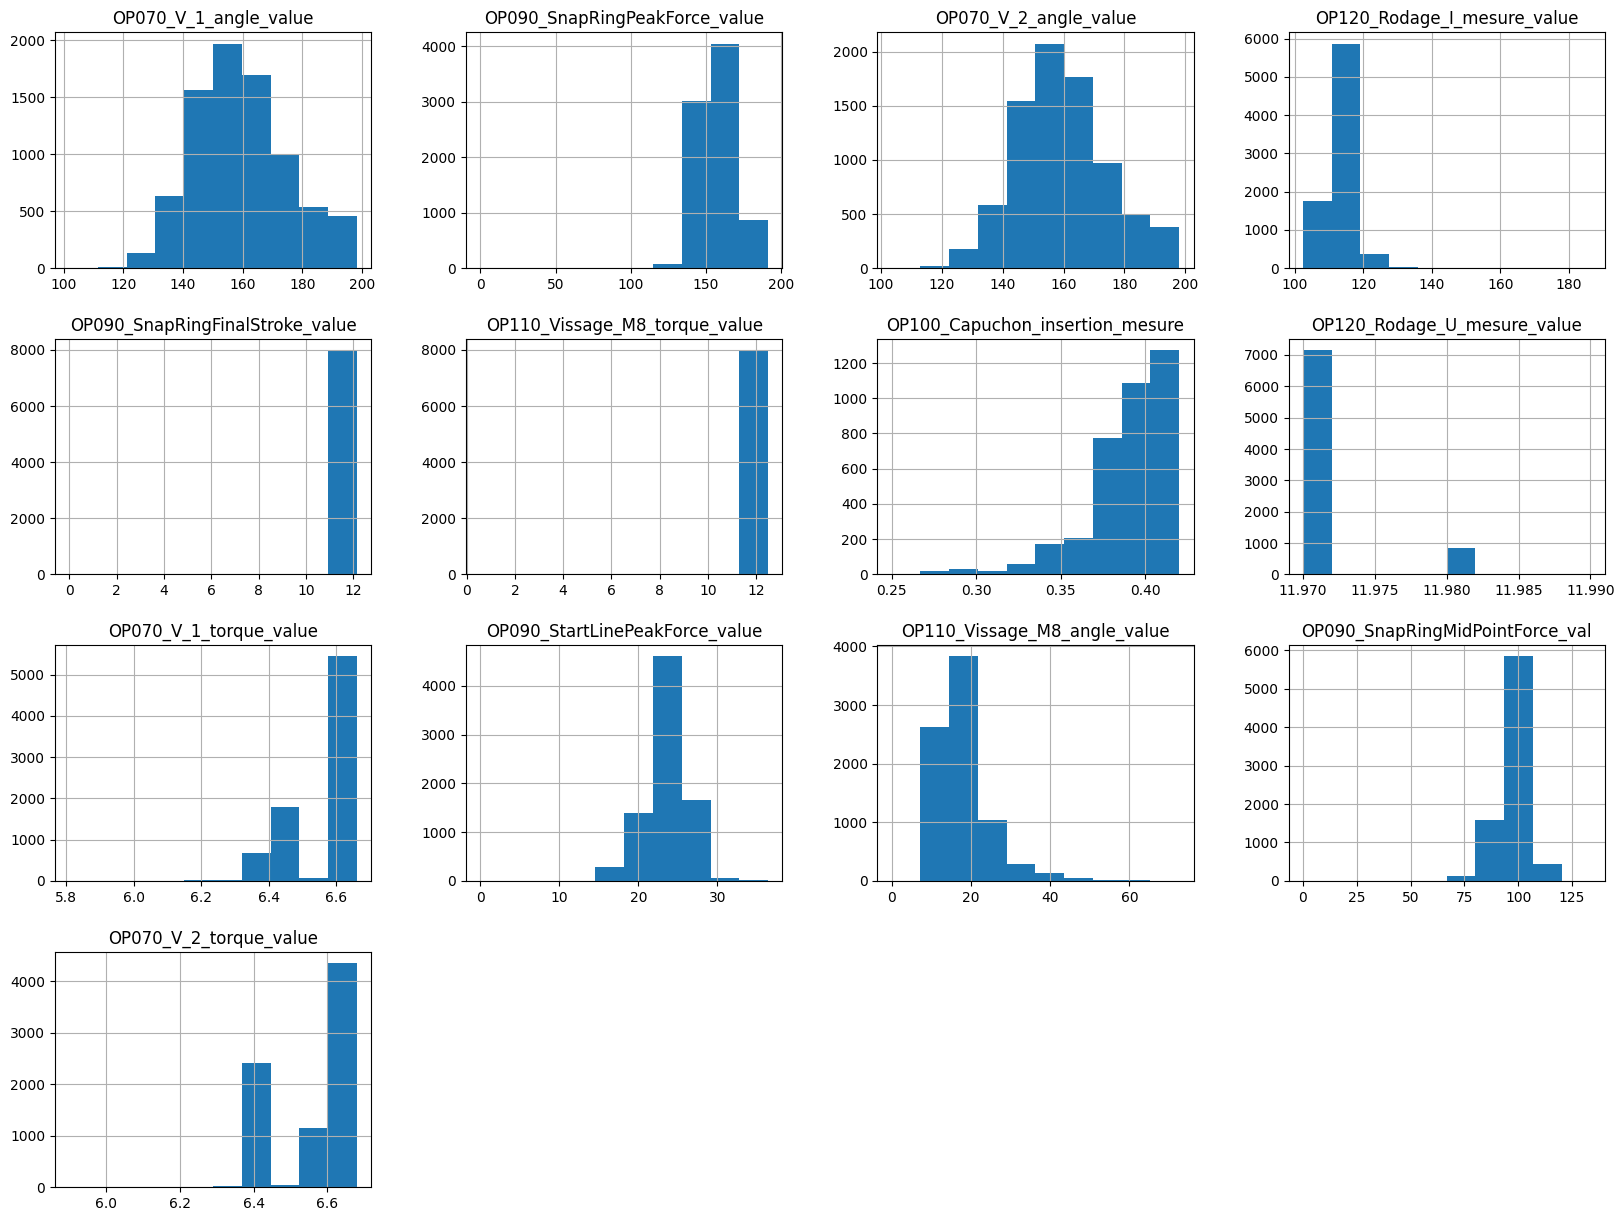

In [33]:
df_test_inputs.hist(figsize = (20,15))